# https://www.projectpro.io/recipes/calculate-diagonal-of-matrix
# https://www.geeksforgeeks.org/python-matrix/



In [2]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import cmath
import scipy
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.special as special
import numpy.ma as ma
import matplotlib.scale as mscale
#np.set_printoptions(threshold=sys.maxsize)
pts = 5000 # number of iterator steps
H_to_K = 1/0.000003166808534191

# $H = -\frac{\hbar}{2m} \frac{d^2}{dx^2} + \frac{1}{2} m \omega x^2 $,  $E_{n} = (n + \frac{1}{2})\hbar \omega$ 
## $ m = \hbar = \omega = 1$, $[E] = \hbar \omega$, $[x] = \sqrt{\frac{\hbar}{m \omega}} $ when adopting harmonic oscillator units

## $H = -\frac{1}{2} \frac{d^2}{dx^2} + \frac{1}{2} x^2 $

## $V = \frac{1}{2} x^2$ and $E_{n} \to (n + \frac{1}{2})$

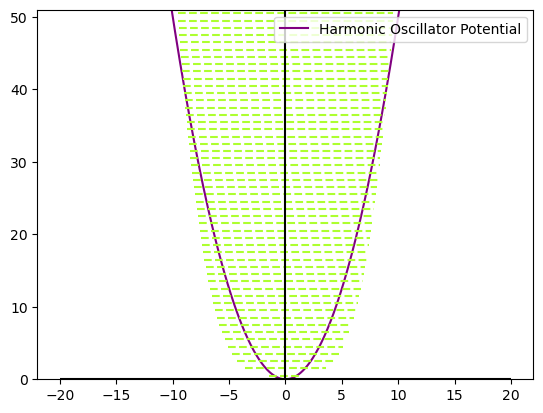

In [4]:
x = np.linspace(-20, 20, pts) #x grid to build off of, in H.O. length units
V = 0.5*(x**2) #Harmonic oscillator potential in H.O. energy units
n = np.arange(0,51, 1) # quantum number n, describes energy bound states
En = n + 0.5

plt.plot(x, V, label = 'Harmonic Oscillator Potential', color = 'purple')
plt.hlines(En[0], -1.5, 1.5, linestyle = 'dashed', color = 'greenyellow')
for i in range(1,len(En)):
    plt.hlines(En[i], 0.18*np.sqrt(np.sqrt(n[i]))*min(x), 0.18*np.sqrt(np.sqrt(n[i]))*max(x), linestyle = 'dashed', color = 'greenyellow')

plt.vlines(0, -0.05*abs(max(V)), max(V), color = 'black')
plt.hlines(0, min(x), max(x), color = 'black')

plt.ylim(0, 51)

plt.legend()

# Analytic Wave functions

# $\varphi_{n}(x) = \frac{1}{\sqrt{2^n n!}} \pi^{-\frac{1}{4}} e^{-\frac{x^2}{2}} H_{n}(x)$, with $H_{n}(x)$ being the Hermite Polynomials


In [6]:
def Harmonic_wave_fct(N, y):
    # computes the first N wave functions for the harmonic oscillator in H.O. units over the grid y
    # Plots wave functions with n even versus the Harmonic oscialltor potential over the same grid
    VHO = 0.5*(y**2)
    plt.plot(y, VHO, color = 'crimson')
    Phin = []
    for i in range(0, N):
        
        coef1 = 1/np.sqrt((2**i)*(scipy.special.factorial(i)))
        coef2 = (np.pi)**(0.25)
        exp_n = np.exp(-1*(y**2)*(0.5))
        Hermite_n = scipy.special.hermite(i)
        E_n = i + 0.5

        Phi_n = coef1*coef2*exp_n*Hermite_n(y)
        PHI_sq = (np.abs(Phi_n))**2
        Phin.append(Phi_n)
        #if i%2 == 0:
        plt.plot(y, PHI_sq + E_n, linestyle = 'dashed', label = f'n={i}')
    return Phin


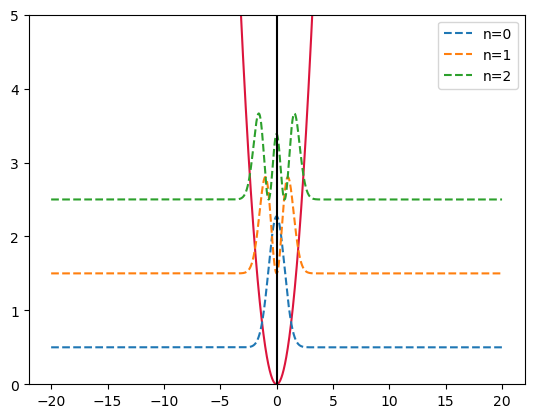

In [7]:
Harmonic_wave_fct(3, x)

plt.ylim(0,5)
plt.vlines(0, 0, 10, color = 'black')
plt.legend()

# Numerical Wave Functions, DVR method

# In general, DVR has
## $T_{ii} = \frac{\hbar^2}{2m(dx)^2} \frac{\pi^2}{3}$, diagonal KE elements
## $T_{ij} = \frac{\hbar^2(-1)^{i-j}}{m(dx)^2} \frac{1}{(i-j)^2}$, off diagonal KE elements

## $V_{ij} = \delta_{ij} V(x_{j}) $, diagonal potential energy matrix
## with $x_{i} = i*dx$, $i=0,\pm1,\pm2,...$, uniformly spaced grid of posistion

## so that
## $H_{ii} = \frac{\hbar^2}{2m(dx)^2} \frac{\pi^2}{3} + V(x_{i})$, diagonal Hamiltonian elements
## $H_{ij} = T_{ij} = \frac{\hbar^2(-1)^{i-j}}{m(dx)^2} \frac{1}{(i-j)^2}$, off diagonal Hamiltonian elements

# For Harmonic Oscillator with 
# $[E] = \hbar \omega$, $[x] = \sqrt{\frac{\hbar}{m \omega}} $ when adopting harmonic oscillator units
# and $ m = \hbar = \omega = 1$
## $T_{ii} = \frac{1}{2(dx)^2} \frac{\pi^2}{3}$, diagonal KE elements
## $T_{ij} = \frac{(-1)^{i-j}}{(dx)^2} \frac{1}{(i-j)^2}$, off diagonal KE elements

## $V_{ii} = \frac{x_{i}^2}{2} $, diagonal potential energy matrix, with off diagonals being equal to zero

# $H_{ii} = \frac{1}{2(dx)^2} \frac{\pi^2}{3} + \frac{x_{i}^2}{2}$, diagonal Hamiltonian elements
# $H_{ij} = T_{ij} = \frac{(-1)^{i-j}}{(dx)^2} \frac{1}{(i-j)^2}$, off diagonal Hamiltonian elements

In [12]:
def Hamiltonian_DVR(dx, Vc):
    # Build the Hamiltonian Matrix for Harmonic Oscillator using DVR
    # Takes in a xmin and xmax to build a grid, a spacing dx, and a cutoff energy Vc
    
    N = int(2*np.sqrt(2*Vc)*(1/dx)) # Number of pts
    if N % 2 == 0: # require N odd for symmetry around 0
        N += 1
        
    xmin = -1*np.sqrt(2*Vc) # xmin determined by Vc
    xmax = np.sqrt(2*Vc) # xmax determined by Vc
    xp = np.linspace(xmin, xmax, N) # box to determine Hamiltonian

    
    
    
    #print(f' len(xp) = {len(xp)}')
    
    H_DVR = np.zeros((len(xp),len(xp))) # Initialize an empty matrix of zeros

    #print(f' shape of xp = {print(xp)}')
    #print(f' shape of H = {H_DVR.shape}')
    #print(H_DVR[0][0:3])
    #print(f' N = {N}')
    #print(f' len(xp) = {len(xp)}')
    #print(f' len(H) = {len(H_DVR)}, len(H[0]) = {len(H_DVR[0])}')
    #print(f' iterator range is {2*max(range(len(xp)/2), int(len(xp)/2) + 1))}')

    offset = int(len(xp)/2) # offset to ensure mapping is correct

    # NOTE on OFFSET: Since i = 0, +-1, +-2, ... we have to add offset so that when we index w/ numpy we correctly map the values, ie -n -> 0, -n + 1 -> 1, since Numpy starts its count at i=0
    
    for i in range(-1*int(len(xp)/2), int(len(xp)/2) + 1): # let i be the rows, start on a row, from -len(xp)/2 to len(xp)/2
        
        for j in range(-1*int(len(xp)/2), int(len(xp)/2) + 1): # Let j be the columns, for a given row i, run along columns and calculate Hij
            
            if i == j: # This will calculate diagonal components of H
                H_DVR[i + offset][j + offset] = (np.pi**2)*(1/6)*(1/(dx**2)) + (xp[i + offset]**2)*0.5 # Fill out diagonal elements according to DVR method
            
            if i != j: # This will calculate off-diagonal components of H
                H_DVR[i + offset][j + offset] = ((-1)**(i-j))*(1/(dx**2))*(1/((i-j)**2)) # Fill out off diagonal elements according to DVR method

    assert(np.allclose(H_DVR, np.transpose(H_DVR))) # Assert Hamilitonian is real symmetric
        

    return H_DVR


## act on eigenvector w/ Hamiltonian, check energy eigenvalue equation - FAILS

## act on eigenvector w/ T, V, check versus formula
#### Find out how numpy sorts eigenvectors - sorts eigenvalues smallest to largest, then sorts each eigenvector with the associated eigenvalue


#### Check if H is real symmettric - It is
#### Check H code versus formulas - They are the same

In [14]:
Vcp = 50
dxp = 0.005
N = int(2*(np.sqrt(2*Vcp))*(1/dxp)) # Number of pts 
if N % 2 == 0: # require N odd for symmetry around 0
    N += 1

print(f' Npts = {N}')

xminp = -1*np.sqrt(2*Vcp)
xmaxp = np.sqrt(2*Vcp)
xpp = np.linspace(xminp, xmaxp, N)

#print(-int(len(xp)/2))
#print(int(len(xp)/2) + 1)

#print(-1*int(len(xpp)/2))
#print(int(len(xpp)/2))
#print(int(N/2))
#print(int(-N/2))

#print(f'xpp = {xpp}')
H = Hamiltonian_DVR(dxp, Vcp)
#print(f' H = {H[0][:]}')
misvec = np.linalg.eigh(H)[1]
Hvec = []

Heig = np.linalg.eigh(H)[0]

for i in range(len(H[0])):
    Hvec.append(misvec[:,i])

print(f' int before = {np.trapz(np.abs(Hvec[0])**2,xpp)}')

for i in range(len(Hvec)):
    INT = np.trapz(np.abs(Hvec[i])**2, xpp)
    A = 1/np.sqrt(INT)
    Hvec[i] = A*Hvec[i]


print(f' int after = {np.trapz(np.abs(Hvec[0])**2,xpp)}')

print(Heig[0:6])
#print(En)

print(f' Eigvals = {Heig[0:10]}')



#for i in range(0,10):
 #   print(round(H1eig[i],6))


#print(len(H1vec[0]))
#print(xp)

#H0 = np.array([[50.41, -(1/4), (1/4)*(1/4), -(1/4)*(1/9), (1/4)*(1/16), -(1/4)*(1/25), (1/4)*(1/36), -(1/4)*(1/49), (1/4)*(1/64), (1/4)*(-1/81), (1/4)*(1/100)],[-(1/4), 32.41, -(1/4), (1/4)*(1/4), (1/4)*(-1/9), (1/4)*(1/16), -(1/4)*(1/25), (1/4)*(1/36), -(1/4)*(1/49), (1/4)*(1/64), (1/4)*(-1/81)],[(1/4)*(1/4), -(1/4), 18.41, -(1/4),(1/4)*(1/4), (1/4)*(-1/9), (1/4)*(1/16), -(1/4)*(1/25), (1/4)*(1/36), -(1/4)*(1/49), (1/4)*(1/64)],[(1/4)*(-1/9), (1/4)*(1/4), -(1/4), 8.41, -(1/4), (1/4)*(1/4), (1/4)*(-1/9), (1/4)*(1/16), -(1/4)*(1/25), (1/4)*(1/36), -(1/4)*(1/49)],[(1/4)*(1/16), (1/4)*(-1/9), (1/4)*(1/4), -(1/4), 2.41, -(1/4), (1/4)*(1/4), (1/4)*(-1/9), (1/4)*(1/16), -(1/4)*(1/25), (1/4)*(1/36)],[-(1/4)*(1/25), (1/4)*(1/16), (1/4)*(-1/9), (1/4)*(1/4), -(1/4), 0.41, -(1/4), (1/4)*(1/4), (1/4)*(-1/9), (1/4)*(1/16), -(1/4)*(1/25)],[(1/4)*(1/36),-(1/4)*(1/25), (1/4)*(1/16), (1/4)*(-1/9), (1/4)*(1/4), -(1/4), 2.41, -(1/4), (1/4)*(1/4), (1/4)*(-1/9), (1/4)*(1/16)],[(1/4)*(-1/49),(1/4)*(1/36),-(1/4)*(1/25), (1/4)*(1/16), (1/4)*(-1/9), (1/4)*(1/4), -(1/4), 8.41, -(1/4), (1/4)*(1/4), (1/4)*(-1/9)],[(1/4)*(1/64),(1/4)*(-1/49),(1/4)*(1/36),-(1/4)*(1/25), (1/4)*(1/16), (1/4)*(-1/9), (1/4)*(1/4), -(1/4), 18.41, -(1/4), (1/4)*(1/4)],[(1/4)*(-1/81),(1/4)*(1/64),(1/4)*(-1/49),(1/4)*(1/36),-(1/4)*(1/25), (1/4)*(1/16), (1/4)*(-1/9), (1/4)*(1/4), -(1/4), 32.41, -(1/4)],[(1/4)*(1/100),(1/4)*(-1/81),(1/4)*(1/64),(1/4)*(-1/49),(1/4)*(1/36),-(1/4)*(1/25), (1/4)*(1/16), (1/4)*(-1/9), (1/4)*(1/4), -(1/4), 50.41]])

#print(f' H1[4][:] = {H1[4][:]}')
#print(f' H0[4][:] = {H0[4][:]}')

#print(f' H1[6][:] = {H1[6][:]}')
#print(f' H0[6][:] = {H0[6][:]}')

#print(np.linalg.eigh(H - H0)[0])
#c = np.arange(-10,12,2)
#op = (1/6)*(1/4)*(np.pi**2)
#print((op + 0.5*c**2) - (0.41 + 0.5*c**2))


 Npts = 4001
 int before = 0.0049999999999999975
 int after = 0.9999999999999998
[0.5 1.5 2.5 3.5 4.5 5.5]
 Eigvals = [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


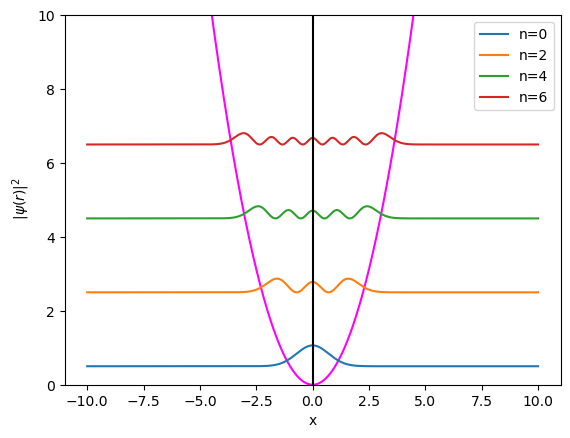

In [15]:
#plt.plot(xpp, np.abs(Hvec[0])**2, color = 'blue')
plt.plot(xpp, 0.5*(xpp**2), color = 'fuchsia')
#plt.ylim(0,5)

for i in range(7):
    if i % 2 == 0:
        plt.plot(xpp, np.abs(Hvec[i])**2 + Heig[i], label = f'n={i}')


plt.xlabel('x')
plt.ylabel(f' $|\\psi(r)|^2$')
plt.ylim(0,10)
plt.legend()


plt.vlines(0, 0, 50, color = 'black')

# Eigenvalue Equation check
# $H\varphi_{n} = E_{n}\varphi_{n}$

# Normalization check
# $ \braket{\varphi_{n}|\varphi_{n}} = 1 $

In [17]:
tol = 1e-4
bad_count = 0

for i in range(int(Vcp/2.5)):
    HPhin = np.matmul(H,Hvec[i])
    EPhin = Heig[i]*Hvec[i]

    diff = np.abs(HPhin - EPhin)
    for j in range(len(diff)):
        if diff[j] > tol:
            bad_count += 1

print(bad_count)

0


In [18]:
tol = 1e-4
bad_count_int = 0

for i in range(int(Vcp/2.5)):
    an_int = np.trapz(np.abs(Hvec[i])**2,xpp)
    if abs(an_int - 1) > tol:
        bad_count += 1

print(bad_count_int)

0


In [19]:
def T_DVR(dx, Vc):
    # Build the Kinetic Energy Matrix for Harmonic Oscillator using DVR
    # Takes in a xmin and xmax to build a grid, a spacing dx, and a cutoff energy Vc
    
    N = int(2*np.sqrt(2*Vc)*(1/dx)) # Number of pts
    if N % 2 == 0: # require N odd for symmetry around 0
        N += 1
        
    xmin = -1*np.sqrt(2*Vc) # xmin determined by Vc
    xmax = np.sqrt(2*Vc) # xmax determined by Vc
    xp = np.linspace(xmin, xmax, N) # box to determine T
    
    KE_DVR = np.zeros((len(xp),len(xp))) # Initialize an empty matrix of zeros

    offset = int(len(xp)/2) # offset to ensure mapping is correct

    # NOTE on OFFSET: Since i = 0, +-1, +-2, ... we have to add offset so that when we index w/ numpy we correctly map the values, ie -n -> 0, -n + 1 -> 1, since Numpy starts its count at i=0
    
    for i in range(-1*int(len(xp)/2), int(len(xp)/2) + 1): # let i be the rows, start on a row, from -len(xp)/2 to len(xp)/2
        
        for j in range(-1*int(len(xp)/2), int(len(xp)/2) + 1): # Let j be the columns, for a given row i, run along columns and calculate Tij
           
            if i == j: # This will calculate diagonal components of T
                KE_DVR[i + offset][j + offset] = 0.5*(np.pi**2)*(1/3)*(1/dx)*(1/dx)
            if i != j: # This will calculate off-diagonal components of T
                KE_DVR[i + offset][j + offset] = ((-1)**(i-j))*(1/(dx**2))*(1/((i-j)**2)) # Fill out off diagonal elements according to DVR method

    assert(np.allclose(KE_DVR, np.transpose(KE_DVR))) # Assert KE is real symmetric
        

    return KE_DVR

In [20]:
def V_DVR(dx, Vc):
    # Build the Potential Matrix for Harmonic Oscillator using DVR
    # Takes in a xmin and xmax to build a grid, a spacing dx, and a cutoff energy Vc
    
    N = int(2*np.sqrt(2*Vc)*(1/dx)) # Number of pts
    if N % 2 == 0: # require N odd for symmetry around 0
        N += 1
        
    xmin = -1*np.sqrt(2*Vc) # xmin determined by Vc
    xmax = np.sqrt(2*Vc) # xmax determined by Vc
    xp = np.linspace(xmin, xmax, N) # box to determine Hamiltonian

    V_dvr = np.zeros((len(xp),len(xp))) # Initialize an empty matrix of zeros

    offset = int(len(xp)/2) # offset to ensure mapping is correct

    # NOTE on OFFSET: Since i = 0, +-1, +-2, ... we have to add offset so that when we index w/ numpy we correctly map the values, ie -n -> 0, -n + 1 -> 1, since Numpy starts its count at i=0
    
    for i in range(-1*int(len(xp)/2), int(len(xp)/2) + 1): # let i be the rows, start on a row, from -len(xp)/2 to len(xp)/2
        for j in range(-1*int(len(xp)/2), int(len(xp)/2) + 1): # Let j be the columns, for a given row i, run along columns and calculate Vii
            if i == j: # This will calculate diagonal components of V
                V_dvr[i + offset][j + offset] = 0.5*((xp[i + offset])**2)

    assert(np.allclose(V_dvr, np.transpose(V_dvr))) # Assert Potential is real symmetric
    return V_dvr

In [21]:
T = T_DVR(dxp, Vcp)
V = V_DVR(dxp, Vcp)

In [22]:
Teig = np.linalg.eigh(T)[0]
Veig = np.linalg.eigh(T)[0]

Phi0 = np.abs(Hvec[0])**2

EPhi02 = (Teig[0] + Veig[0])*Phi0

print(EPhi0 * (1/Phi0))
print(EPhi02 * (1/Phi0))

NameError: name 'EPhi0' is not defined

In [ ]:
Tvec = np.linalg.eigh(T)[1]
print(f' int before = {np.trapz(np.abs(Tvec[0])**2,xpp)}')

for i in range(len(Tvec)):
    INT = np.trapz(np.abs(Tvec[i])**2, xpp)
    A = 1/np.sqrt(INT)
    Tvec[i] = A*Tvec[i]


print(f' int after = {np.trapz(np.abs(Tvec[0])**2,xpp)}')

In [ ]:
plt.plot(xpp, np.abs(Tvec[:,0])**2)
print(f' Teig[0] = {Teig[0]}')

T_T0 = np.matmul(T, Tvec[0])
Tn_T0 = Teig[0]*Tvec[0]

print(T_T0 * (1/Tvec[0]))
print(Tn_T0 * (1/Tvec[0]))

In [ ]:
Vvec = np.linalg.eigh(V)[1]
print(f' int before = {np.trapz(np.abs(Vvec[0])**2,xpp)}')

for i in range(len(Vvec)):
    INT = np.trapz(np.abs(Vvec[i])**2, xpp)
    A = 1/np.sqrt(INT)
    Vvec[i] = A*Vvec[i]


print(f' int after = {np.trapz(np.abs(Vvec[0])**2,xpp)}')

In [ ]:
plt.plot(xpp, np.abs(Vvec[174])**2)
print(f' Veig[0] = {Veig[0]}')

V_V0 = np.matmul(V, Vvec[0])
Vn_V0 = Veig[0]*Vvec[0]



#print(T_T0 * (1/Vvec[0]))
#print(Tn_T0 * (1/Vvec[0]))

## dx convergence

In [ ]:
def fractional_diff(E, n):
    #fractional difference function for H.O.
    En = 0.5 + n
    diff = E/En - 1

    return diff

In [ ]:
Vcp = 30
dx_range = np.linspace(0.005,2,400)
np.arange(0,10,1)

fracdiffsx = [ [] for i in range(len(n)) ]


plt.hlines(0,min(dx_range),max(dx_range), color = 'black')

for i in range(len(dx_range)):
    H_dx = Hamiltonian_DVR(dx_range[i], Vcp)
    H_dx_eig = np.linalg.eigh(H_dx)[0]
    Ex_vals = H_dx_eig[0:9]
    #print(Ex_vals)
    
    

    for j in range(len(Ex_vals)):
        a_diffx = fractional_diff(Ex_vals[j], j)
        fracdiffsx[j].append(a_diffx)


for i in range(len(fracdiffsx)):
    if len(dx_range) == len(fracdiffsx[i]):
        if i % 2 == 0:
            plt.plot(dx_range, fracdiffsx[i], label = f'n={i}') 

plt.legend()
plt.xlabel('dx')
plt.ylabel('Fractional Error ($\\frac{E_{DVR}}{E_{exact}} - 1$)')
plt.yscale('log')
plt.ylim(1e-8,1)

## Vc convergence

In [ ]:
Vc_range = np.linspace(2, 18, 400)
dx = 0.005
n = np.arange(0,10,1)
fracdiffs = [ [] for i in range(len(n)) ]

plt.hlines(0, min(Vc_range), max(Vc_range), color = 'black')

for i in range(len(Vc_range)):
    H_Vc = Hamiltonian_DVR(dx, Vc_range[i])
    H_Vc_eig = np.linalg.eigh(H_Vc)[0]
    E_vals = np.sort(H_Vc_eig)[0:9]
    
    for j in range(len(E_vals)):
        a_diff = fractional_diff(E_vals[j], j)
        fracdiffs[j].append(a_diff)
        
for i in range(len(fracdiffs) - 1):
    if len(Vc_range) == len(fracdiffs[i]):
        if i % 2 == 0:
            plt.plot(Vc_range, fracdiffs[i], label = f'n={i}') 

plt.legend()

plt.xlabel('Vc')
plt.ylabel('Fractional Error ($\\frac{E_{DVR}}{E_{exact}} - 1$)')
plt.yscale('log')


plt.ylim(1e-8,1)



In [ ]:
plt.hlines(0, min(Vc_range), max(Vc_range), color = 'black')

for i in range(len(fracdiffs) - 1):
    if i % 2 == 0:
        plt.plot(Vc_range, fracdiffs[i], label = f'n={i}') 

plt.legend()
plt.xlabel('Vc')
plt.ylabel('Fractional Error ($\\frac{E_{DVR}}{E_{exact}} - 1$)')
plt.ylim(-1e-2,0.1)

In [ ]:
M = np.array([[2,0.1,-2],[0.1,2,-6.15],[-2,-6.15,3]])
#print(M)
assert(np.allclose(M,np.transpose(M)))

Mvec = np.linalg.eigh(M)[1]
Meig = np.linalg.eigh(M)[0]

#print(Meig)
#print(Mvec)

#print(Mvec[:,0])
print(np.matmul(M, Mvec[:,2]))
print(Meig[2]*Mvec[:,2])



In [ ]:
print(Sx[0,:])